In [5]:
import sys
sys.executable

'/Users/mahipal/anaconda3/bin/python'

In [9]:
import tensorflow as tf

a = tf.placeholder("float")
b = tf.placeholder("float")

y = tf.multiply(a,b)

sess = tf.Session()

print(sess.run(y, feed_dict = {a:3,b:3}))

9.0


# Load some data and try around different things

In [10]:
data = tf.contrib.learn.datasets.mnist.load_mnist()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use a

# K-Means Algorithm 

In [18]:
#Genearte some random data points for clustering example
import numpy as np
num_puntos = 2000
conjunto_puntos = []
for i in range(num_puntos):
   if np.random.random() > 0.5:
     conjunto_puntos.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
   else:
     conjunto_puntos.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)])

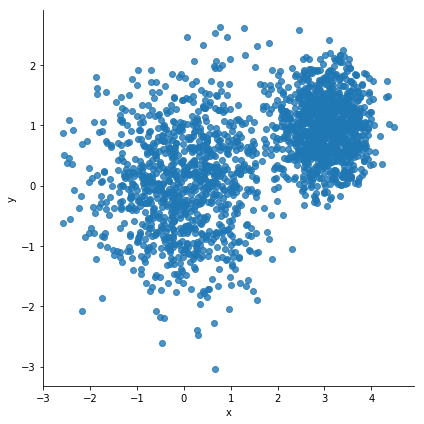

In [20]:
#Display the points that have been genearted randomly
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
df = pd.DataFrame({"x": [v[0] for v in conjunto_puntos],
        "y": [v[1] for v in conjunto_puntos]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()

In [30]:
#k-means implemenattion in tensorflow: 4 clusters
import numpy as np
vectors = tf.constant(conjunto_puntos)
k = 4
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))

expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)

assignments = tf.argmin(tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroides)), 2), 0)

means = tf.concat([tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where( tf.equal(assignments, c)),[1,-1])), reduction_indices=[1]) for c in range(k)],0)

update_centroides = tf.assign(centroides, means)

init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op)

for step in range(100):
   _, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])


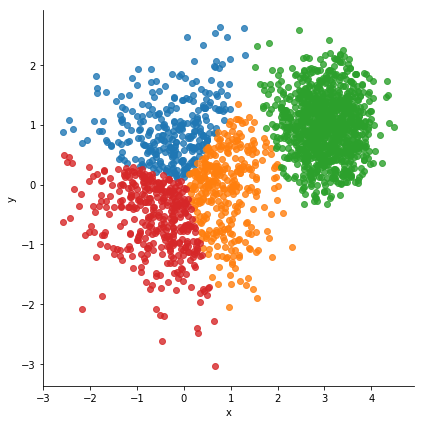

In [32]:
#check the result in assignment_values tensors
data = {"x": [], "y": [], "cluster": []}

for i in range(len(assignment_values)):
  data["x"].append(conjunto_puntos[i][0])
  data["y"].append(conjunto_puntos[i][1])
  data["cluster"].append(assignment_values[i])

df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, fit_reg=False, size=6, hue="cluster", legend=False)
plt.show()

In [33]:
#Single layer Neural Network in tensorflow
mnist = tf.contrib.learn.datasets.mnist.load_mnist()

In [ ]:
#Create variables to contain weight and Bias
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))